In [46]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
from matplotlib.image import imread
import random
from PIL import Image

In [123]:
import numpy as np
import pandas as pd

In [48]:
from sklearn.decomposition import PCA
from scipy.linalg import svd

In [49]:
from io import BytesIO

In [97]:
import sys

In [50]:
DIR_TRAIN = "./train_birds"
num_draw=3
classes = os.listdir(DIR_TRAIN)
classes=np.random.choice(classes,num_draw)
classes

array(['PINK ROBIN', 'NORTHERN RED BISHOP', 'PURPLE SWAMPHEN'],
      dtype='<U25')

In [51]:
cnt_tr=10
cnt_vl_lo=60
cnt_vl_hi=62
cnt_ts_lo=80
cnt_ts_hi=82

In [124]:
%%time
def extract_3D(classes,cnt_tr,cnt_vl_lo, cnt_vl_hi, cnt_ts_lo, cnt_ts_hi):

    train_imgs = []
    for _class in classes:
        for i,img in enumerate(os.listdir(DIR_TRAIN + '/' + _class)):
            if i==cnt_tr:
                break
            s=DIR_TRAIN + '/' + _class+'/'+img
#             print(s)
            image = Image.open(s).convert("RGB")
            # convert image to numpy array
            img_np = np.asarray(image)
            train_imgs.append(img_np)
    
    val_imgs = []
    for _class in classes:
        for i,img in enumerate(os.listdir(DIR_TRAIN + '/' + _class)):
            if i<cnt_vl_lo:
                continue
            elif i>=cnt_vl_hi:
                break        
            else:             
                s=DIR_TRAIN + '/' + _class+'/'+img
#                 print(s)
                image = Image.open(s).convert("RGB")
                # convert image to numpy array
                img_np = np.asarray(image)
                val_imgs.append(img_np) 
                
    test_imgs = []
    for _class in classes:
        for i,img in enumerate(os.listdir(DIR_TRAIN + '/' + _class)):
            if i<cnt_ts_lo:
                continue
            elif i>=cnt_ts_hi:
                break        
            else:             
                s=DIR_TRAIN + '/' + _class+'/'+img
                print(s)
                image = Image.open(s).convert("RGB")
                # convert image to numpy array
                img_np = np.asarray(image)
                test_imgs.append(img_np) 
    
    train_np=np.array(train_imgs)
    train_np=act_tr/255.
    print("train images shape:",train_np.shape)
    
    val_np=np.array(val_imgs)
    val_np=act_vl/255.
    print("val images shape:",val_np.shape)
    
    test_np=np.array(test_imgs)
    test_np=act_ts/255.    
    
    
    train_lbls = []
    for _class in classes:
        for i,img in enumerate(os.listdir(DIR_TRAIN + '/' + _class)):
            if i==cnt_tr:
                break
            s=DIR_TRAIN + '/' + _class+'/'+img
            label = s.split("/")[-2]
            train_lbls.append(label)
#             print(label)
            
    
    val_lbls = []
    for _class in classes:
        for i,img in enumerate(os.listdir(DIR_TRAIN + '/' + _class)):
            if i<cnt_vl_lo:
                continue
            elif i>=cnt_vl_hi:
                break        
            else:  
                s=DIR_TRAIN + '/' + _class+'/'+img
                label = s.split("/")[-2]
                val_lbls.append(label)
#                 print("test",label)

    test_lbls = []
    for _class in classes:
        for i,img in enumerate(os.listdir(DIR_TRAIN + '/' + _class)):
            if i<cnt_ts_lo:
                continue
            elif i>=cnt_ts_hi:
                break        
            else:  
                s=DIR_TRAIN + '/' + _class+'/'+img
                label = s.split("/")[-2]
                test_lbls.append(label)
            
    
    classes_2int = {classes[i]: i for i in range(len(classes))}
    print("Number of Classes:",len(classes_2int))
    
    
    train_lbls_int=[classes_2int.get(train_lbls[i]) for i in range(len(train_lbls))]
    train_lbls_int=np.array(train_lbls_int)
    print("Number of Training Labels:",len(train_lbls_int))
    
    val_lbls_int=[classes_2int.get(val_lbls[i]) for i in range(len(val_lbls))]
    val_lbls_int=np.array(val_lbls_int)
    print("Number of Validation Labels:",len(val_lbls_int))
    
    test_lbls_int=[classes_2int.get(test_lbls[i]) for i in range(len(test_lbls))]
    test_lbls_int=np.array(test_lbls_int)
    print("Number of Testing Labels:",len(test_lbls_int))
    
    return train_np,val_np, test_np,train_lbls_int, val_lbls_int ,  test_lbls_int   

Wall time: 0 ns


In [125]:
train_imgs,val_imgs, test_imgs, train_lbls, val_lbls, test_lbls=extract_3D(classes,cnt_tr,
                                                                                           cnt_vl_lo, cnt_vl_hi, 
                                                                                          cnt_ts_lo, cnt_ts_hi)

./train_birds/PINK ROBIN/081.jpg
./train_birds/PINK ROBIN/082.jpg
./train_birds/NORTHERN RED BISHOP/081.jpg
./train_birds/NORTHERN RED BISHOP/082.jpg
./train_birds/PURPLE SWAMPHEN/081.jpg
./train_birds/PURPLE SWAMPHEN/082.jpg
train images shape: (30, 224, 224, 3)
val images shape: (6, 224, 224, 3)
Number of Classes: 3
Number of Training Labels: 30
Number of Validation Labels: 6
Number of Testing Labels: 6


In [126]:
train_imgs.shape

(30, 224, 224, 3)

In [127]:
one=train_imgs[0]
one.shape

(224, 224, 3)

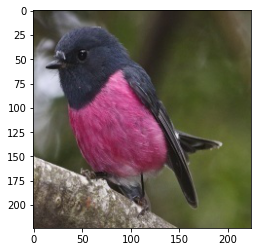

In [128]:
plt.imshow(one)

In [129]:
one_t=one.T
one_t.shape

(3, 224, 224)

In [130]:
pca = PCA(n_components=30)

In [131]:
uni_r = one_t[0].reshape(one.shape[0],one.shape[1])
uni_g = one_t[1].reshape(one.shape[0],one.shape[1])
uni_b = one_t[2].reshape(one.shape[0],one.shape[1])
uni_r_pca=pca.fit_transform(uni_r)#projection
comp_r=pca.components_
mean_r=pca.mean_
uni_g_pca=pca.fit_transform(uni_g)#projection
# print(pca.n_components_)
comp_g=pca.components_
mean_g=pca.mean_
uni_b_pca=pca.fit_transform(uni_b)#projection
# print(pca.n_components_)
comp_b=pca.components_
mean_b=pca.mean_
    
img_pca = np.dstack((uni_r_pca,uni_g_pca, uni_b_pca))
img_pca.shape  


(224, 30, 3)

In [132]:
r==g

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [133]:
cprss_r=np.dot(uni_r_pca, comp_r) + mean_r
cprss_g=np.dot(uni_g_pca, comp_g) + mean_g
cprss_b=np.dot(uni_b_pca, comp_b) + mean_b

In [134]:
cprss_r.shape

(224, 224)

In [135]:
img_cprss = np.dstack((cprss_r.T,cprss_g.T, cprss_b.T))
img_cprss.shape

(224, 224, 3)

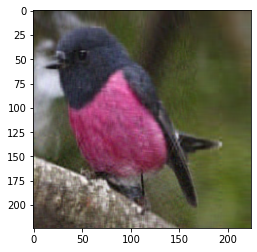

In [136]:
plt.imshow(img_cprss)

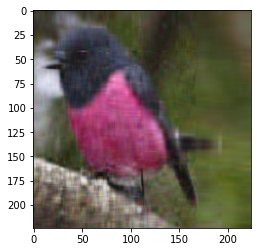

In [145]:
pca2 = PCA(n_components=15)
uni_r = one_t[0].reshape(one.shape[0],one.shape[1])
uni_g = one_t[1].reshape(one.shape[0],one.shape[1])
uni_b = one_t[2].reshape(one.shape[0],one.shape[1])
uni_r_pca2=pca2.fit_transform(uni_r)#projection
comp_r2=pca2.components_
mean_r2=pca2.mean_
uni_g_pca2=pca2.fit_transform(uni_g)#projection
# print(pca.n_components_)
comp_g2=pca2.components_
mean_g2=pca2.mean_
uni_b_pca2=pca2.fit_transform(uni_b)#projection
# print(pca.n_components_)
comp_b2=pca2.components_
mean_b2=pca2.mean_
    

  
cprss_r2=np.dot(uni_r_pca2, comp_r2) + mean_r2
cprss_g2=np.dot(uni_g_pca2, comp_g2) + mean_g2
cprss_b2=np.dot(uni_b_pca2, comp_b2) + mean_b2
img_cprss2 = np.dstack((cprss_r2.T,cprss_g2.T, cprss_b2.T))

plt.imshow(img_cprss2)

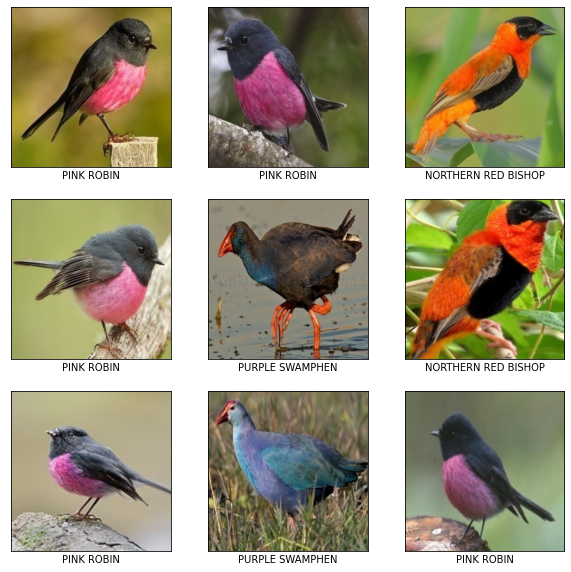

In [147]:
plt.figure(figsize=(10,10))
n=9
rnd_drawn=np.random.choice(train_imgs.shape[0], n, replace=False)
for i,img in enumerate(rnd_drawn):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)    
    plt.imshow(train_imgs[img], cmap=plt.cm.binary)
    plt.xlabel(classes[train_lbls[img]])